<h2> Stacked bar chart </h2>

multiple bars, pies can represent multiple categorical attributes and one ordinal attribute in a single plot
two indexes, one value



data are often loaded into pandas dataframes

In [3]:
import pandas as pd
df = pd.DataFrame({'Day': ['Mon', 'Tue', 'Wed', 'Thur', 'Fri'],
                   'Morning': [44, 46, 49, 59, 54],
                   'Evening': [33, 46, 50, 49, 60]})

not efficient to use matplotlib syntax to handle this

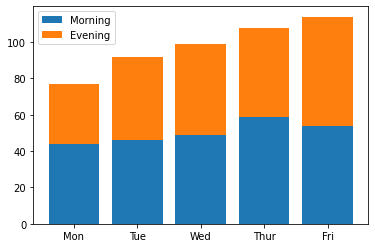

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.bar(df['Day'], df['Morning'],label='Morning')
ax.bar(df['Day'], df['Evening'],bottom=df['Morning'], label='Evening')
ax.legend()


but we can use pandas wrapper

<AxesSubplot:xlabel='Day'>

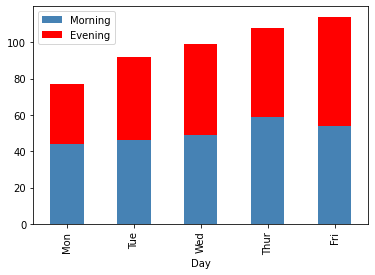

In [6]:
df.set_index('Day').plot(kind='bar', stacked='true', color=['steelblue', 'red'])

if stacked false, paired plot (what is changing?)

<AxesSubplot:xlabel='Day'>

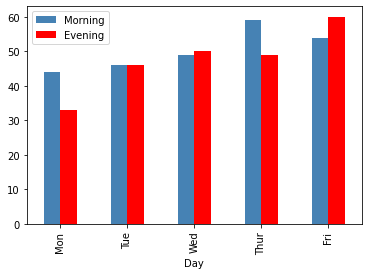

In [7]:
df.set_index('Day').plot(kind='bar', color=['steelblue', 'red'])

want to show only percentage?

<AxesSubplot:xlabel='Day'>

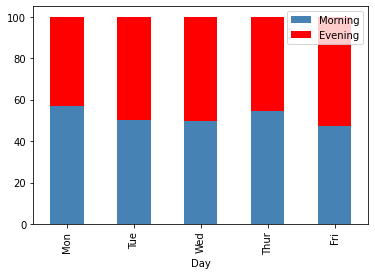

In [8]:
df_total = df["Morning"] + df["Evening"]
df_rel = df[df.columns[1:]].div(df_total, 0) * 100
df[df.columns[1:]]=df_rel
df.set_index('Day').plot(kind='bar', stacked='true', color=['steelblue', 'red'])

note: if the data is organized by original items, 2 categorical attributes and 1 ordinal, they would be like this

In [9]:
df = pd.DataFrame({'Day': ['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Mon', 'Tue', 'Wed', 'Thur', 'Fri'],
                   'time': ['Morning','Morning','Morning','Morning','Morning','Evening','Evening','Evening','Evening','Evening'],
                   'value': [44, 46, 49, 59, 54, 33, 46, 50, 49, 60]})
df.head()

,Day,time,value
0,Mon,Morning,44
1,Tue,Morning,46
2,Wed,Morning,49
3,Thur,Morning,59
4,Fri,Morning,54


and to get the data organized for the chart they should be processed

In [31]:
pdf=df.groupby('Day')
pdf.head()


,Day,Morning,Evening
0,Mon,44,33
1,Tue,46,46
2,Wed,49,50
3,Thur,59,49
4,Fri,54,60


<AxesSubplot:xlabel='Day'>

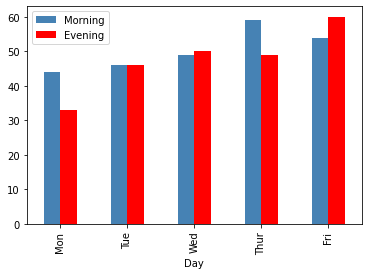

In [33]:
df.set_index('Day').plot(kind='bar', color=['steelblue', 'red'])